In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# to make this notebook's output stable across runs
np.random.seed(42)

# Training Models

* **Closed Form equation :** directly computes the model parameters that best fit the model to the training set 


* **Iterative optimization approach :** called Gradient Descent that gradually tweaks the model parameters to minimize the cost functionover the training set

## Linear Regression Model

<h2>$\hat{y} = h_{\theta}(x) = \theta^T . x $</h2>

with :  
$\theta$ : model's parameter vector  
$\theta^T$ : transpose of  $\theta$  
$x$ : instance's feature vector  
$h_{\theta}$ : hypothesis function

The model is parametrized by the vector $\theta$

### The normal Equation

To find the value of $\theta$ that minimizes the cost function, there is a <i>closed-form solution</i> - in other words, a mathematical equation that gives the result directly. Called the **Normal Equation**.

<h2>$\hat{\theta} = (X^T.X)^{-1}.X^T.y$</h2>

with :  
$\hat{\theta}$ : value of $\theta$ that minimizes the cost function  
**y** : is the vector of target values containing y1 to ym

(0.0, 2.0, 0.0, 15.0)

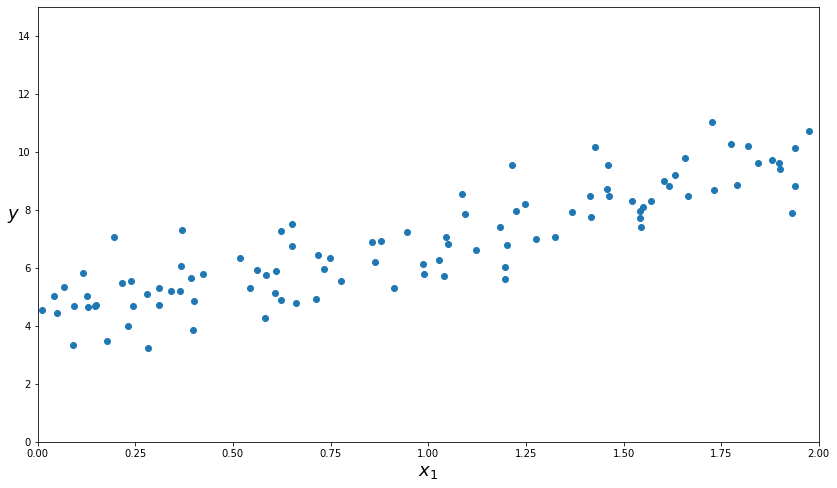

In [3]:
# generate linear looking data to test the equation
X = 2*np.random.rand(100,1)
y = 4 + 3*X +np.random.randn(100,1) # 4x+3+gaussian noise

plt.figure(figsize=(14,8))
plt.scatter(X,y)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])


In [4]:
X_b = np.c_[np.ones((100,1)),X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

We would hace hope for $\theta_0$ = 4 and $\theta_1$ = 3. But instead we got 4.215 and 2.77, cause of the noise that made it impossible to recover the exact parameters of the original function.